In [ ]:
import pandas as pd
from tensorflow.python import keras as K
from tensorflow.python.keras.layers import InputLayer, Dense

In [2]:
PATH = "../datasets/diamonds.csv"
df = pd.read_csv(PATH)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50000 non-null  float64
 1   cut      50000 non-null  object 
 2   color    50000 non-null  object 
 3   clarity  50000 non-null  object 
 4   depth    50000 non-null  float64
 5   table    50000 non-null  float64
 6   price    50000 non-null  int64  
 7   x        50000 non-null  float64
 8   y        50000 non-null  float64
 9   z        50000 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.8+ MB


`pandas.DataFrame.info()` is personally preferable by me since you get more insight than just `pandas.DataFrame.head()`. We can see the amount of rows, `dtype`s, null rows, and much more.

In [3]:
df.drop(columns=['x', 'y', 'z'], axis='columns')    # drops the whole columns, not just the indices of those columns

,carat,cut,color,clarity,depth,table,price
0,0.23,Ideal,E,SI2,61.5,55.0,326
1,0.21,Premium,E,SI1,59.8,61.0,326
2,0.23,Good,E,VS1,56.9,65.0,327
3,0.29,Premium,I,VS2,62.4,58.0,334
4,0.31,Good,J,SI2,63.3,58.0,335
...,...,...,...,...,...,...,...
49995,0.72,Ideal,D,SI1,60.8,57.0,2757
49996,0.72,Good,D,SI1,63.1,55.0,2757
49997,0.70,Very Good,D,SI1,62.8,60.0,2757
49998,0.86,Premium,H,SI2,61.0,58.0,2757


# Encoding Categorical Data

Categorical data must be encoded into numerical data. What counts as categorical data is data whose `dtype` is not `float64` or `int64`.

In [4]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

encoder = OneHotEncoder(sparse_output=False)
categorical_cols = df.select_dtypes(include='object').columns.tolist()

encoded_data = encoder.fit_transform(df.select_dtypes(include='object'))
encoded_data = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))
encoded_data

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
49996,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
49997,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
49998,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Another way to One-Hot encode categorical data is to use the `get_dummies()` function in the pandas library

In [5]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, dtype=float)
df_encoded

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.72,60.8,57.0,2757,5.75,5.76,3.50,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
49996,0.72,63.1,55.0,2757,5.69,5.75,3.61,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
49997,0.70,62.8,60.0,2757,5.66,5.68,3.56,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
49998,0.86,61.0,58.0,2757,6.15,6.12,3.74,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# Dataset Splitting

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_temp, y_train, y_temp = train_test_split(encoded_data,
                                                    df['price'],
                                                    test_size=.2, 
                                                    random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp,
                                                y_temp,
                                                test_size=.5, 
                                                random_state=42)

# Data Normalization

**Data normalization comes after dataset splitting!**

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test  = scaler.transform(x_test)
x_val = scaler.transform(x_val)

# Neural Network Building

In [ ]:
model = K.Sequential([
    InputLayer(input_shape=(x_train.shape[1], )),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

In [9]:
model.compile(optimizer='adam', 
              loss='mse', 
              metrics=['mae'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1344      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 3,457
Trainable params: 3,457
Non-trainable params: 0
_________________________________________________________________


In [11]:
stopper = K.callbacks.EarlyStopping(monitor='loss', 
                                    patience=3)

In [12]:
history = model.fit(x_train, 
                    y_train,
                    validation_data=(x_val, y_val), 
                    epochs=50, 
                    batch_size=128) 

Epoch 1/50
313/313 [==============================] - 1s 2ms/step - loss: 30521682.0000 - mae: 3806.5381 - val_loss: 25177800.0000 - val_mae: 3282.6477
Epoch 2/50
313/313 [==============================] - 1s 2ms/step - loss: 20602446.0000 - mae: 2865.5447 - val_loss: 14863312.0000 - val_mae: 2601.8950
Epoch 3/50
313/313 [==============================] - 1s 2ms/step - loss: 15229654.0000 - mae: 2765.5684 - val_loss: 14086473.0000 - val_mae: 2774.4951
Epoch 4/50
313/313 [==============================] - 1s 2ms/step - loss: 14932546.0000 - mae: 2841.1980 - val_loss: 14057149.0000 - val_mae: 2820.2317
Epoch 5/50
313/313 [==============================] - 1s 2ms/step - loss: 14893597.0000 - mae: 2858.9519 - val_loss: 14033502.0000 - val_mae: 2814.3164
Epoch 6/50
313/313 [==============================] - 1s 2ms/step - loss: 14871468.0000 - mae: 2857.7095 - val_loss: 14028097.0000 - val_mae: 2814.6191
Epoch 7/50
313/313 [==============================] - 1s 2ms/step - loss: 14854190.0000 

Text(0, 0.5, 'loss')

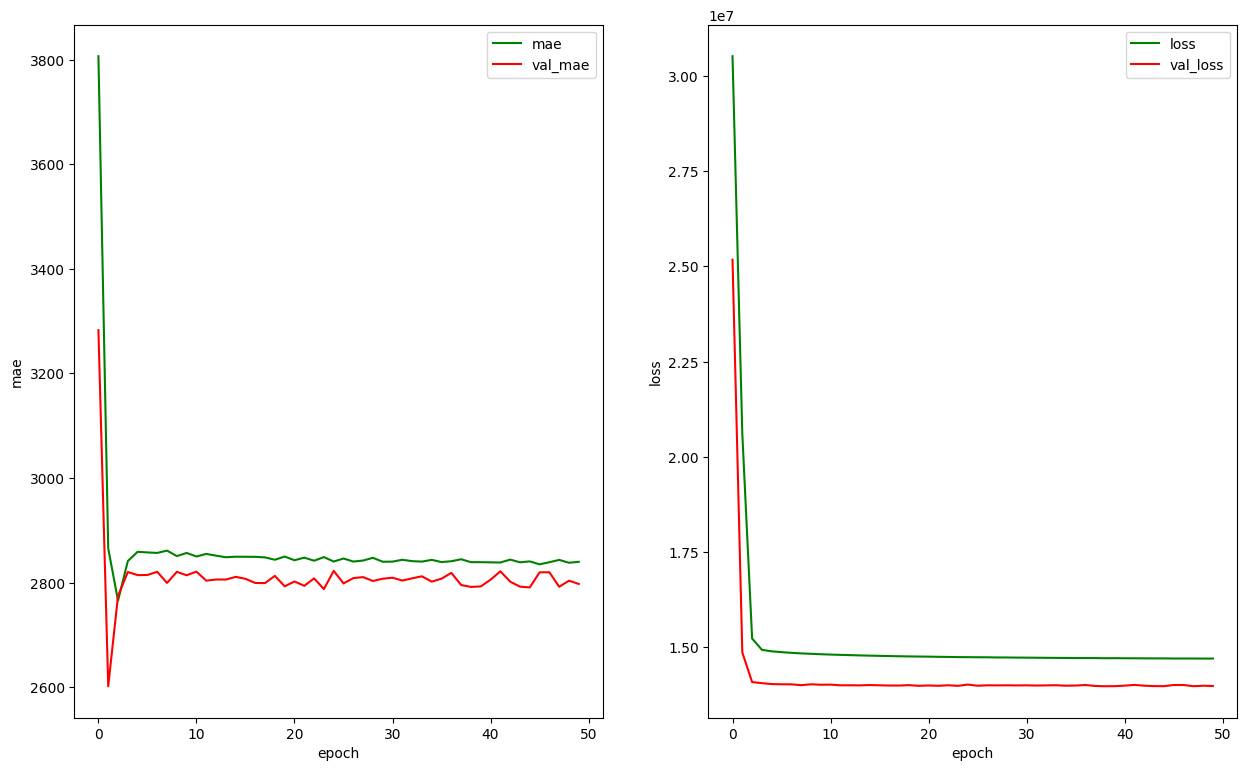

In [13]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1,2,
                               figsize=(15,9))
ax1.plot(history.history['mae'], 'g', label='mae')
ax1.plot(history.history['val_mae'], 'r', label='val_mae')
ax1.legend()
ax1.set_xlabel('epoch')
ax1.set_ylabel('mae')
ax2.plot(history.history['loss'], 'g', label='loss')
ax2.plot(history.history['val_loss'], 'r', label='val_loss')
ax2.legend()
ax2.set_xlabel('epoch')
ax2.set_ylabel('loss')

# Model Evaluation

In [14]:
mse, mae = model.evaluate(x_test, y_test)
print("Mean Squared Error: {0}\nMean Absolute Error: {1}".format(mse,mae))

157/157 [==============================] - 0s 1ms/step - loss: 14552665.0000 - mae: 2841.1453
Mean Squared Error: 14552665.0
Mean Absolute Error: 2841.145263671875


# Model Exporting

In [15]:
model.save('regression.keras')  # *.h5 is considered legacy
                                # on a certain TF version